<a href="https://colab.research.google.com/github/gh-ita/EcommerceStrategy-/blob/main/ECommerceSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Environment simulation preparation

We set the number of marketing strategies and the number of customers.and for each strategy we set a conversion rate.

In [3]:
strategies = 9
customers = 10000
conv_rates = [0.04,0.16,0.08,0.22,0.11,0.01,0.13,0.09,0.16]

We create the environment matrix to save the strategy chosen by each customer.

In [4]:
env_matrix = np.array(np.zeros([customers,strategies]))

We simulate the choice of each customer by choosing a random number between 0 and 1 for each strategy, if the number is less than the strategy's conversion rate than the strategy is effective so we save a 1 if not than it is a 0.

In [5]:
for i in range(customers):
  for j in range(strategies):
    if np.random.rand() <= conv_rates[j] :
      env_matrix[i][j] = 1

# AI implementation

In [11]:
selected_strategy_rs = []
selected_strategy_ts = []
selection_times = np.array(np.ones(strategies))
non_selection_times = np.array(np.ones(strategies))
total_rewards_ts = 0
total_rewards_rs = 0

## Random selection application

In [12]:
for i in range(customers) :
  selected_strat = random.randrange(strategies)
  selected_strategy_rs.append(selected_strat)
  total_rewards_rs += env_matrix[i,selected_strat]


## Thompson sampling application

In [13]:
for i in range(customers) :
  selection = 0
  max_random = 0
  for j in range(strategies) :
    random = np.random.beta(selection_times[j],non_selection_times[j])
    if random >= max_random :
      max_random = random
      selection = j
  selected_strategy_ts.append(selection)
  if env_matrix[i,selection] == 1:
    selection_times[selection] += 1
  else :
    non_selection_times[selection] += 1
  total_rewards_ts += env_matrix[i,selection]




After implementing two algorithms to select the right strategy, random selection and thompson sampling we will compare their results to see how each performed compared to the other.

In [16]:
relative_return = (total_rewards_ts - total_rewards_rs) / total_rewards_rs*100

In [17]:
print(relative_return)

92.81221922731356


Here we can see that the thompson sampling algorithm selected the right strategy double the times random selection did.

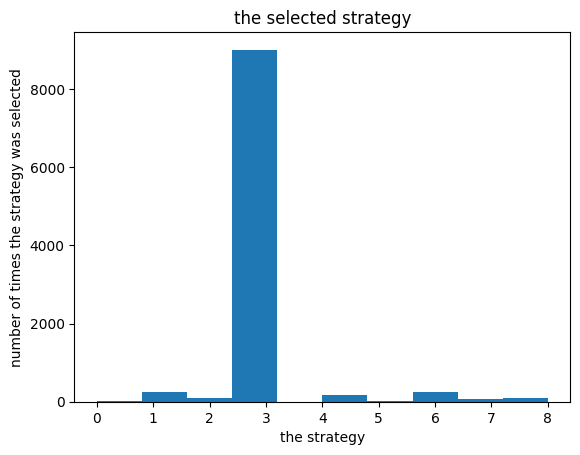

In [18]:
plt.hist(selected_strategy_ts)
plt.title('the selected strategy')
plt.ylabel("number of times the strategy was selected")
plt.xlabel("the strategy")
plt.show()

Here we can effectively see that the strategy with the highest conversion rate which is the fourth strategy is the one selected by the thompson sampling model here with the index 3, we can also notice that the model was able to select the right strategy at less than 2000 rounds.

